In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error,accuracy_score,mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow import keras
from xgboost import XGBRegressor

In [4]:
kerasModel = keras.models.load_model('DeepModel1')

In [6]:
df = pd.read_csv('../data/min_max_df.csv', parse_dates=['date'], index_col=[0])

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,2014-10-13,0.018880,0.222222,0.066667,0.061503,0.003108,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6414100192,2014-12-09,0.060352,0.222222,0.233333,0.167046,0.004072,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5631500400,2015-02-25,0.013382,0.111111,0.066667,0.030372,0.005743,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,2014-12-09,0.069011,0.333333,0.333333,0.120729,0.002714,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,2015-02-18,0.056678,0.222222,0.200000,0.099468,0.004579,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated', 'since_reno',
       'has_basement', 'basement_lot_pct', 'aboveground_lot_pct', 'PctofLot',
       'age', 'likelyApartment', '98001', '98002', '98003', '98004', '98005',
       '98006', '98007', '98008', '98010', '98011', '98014', '98019', '98022',
       '98023', '98024', '98027', '98028', '98029', '98030', '98031', '98032',
       '98033', '98034', '98038', '98039', '98040', '98042', '98045', '98052',
       '98053', '98055', '98056', '98058', '98059', '98065', '98070', '98072',
       '98074', '98075', '98077', '98092', '98102', '98103', '98105', '98106',
       '98107', '98108', '98109', '98112', '98115', '98116', '98117', '98118',
       '98119', '98122', '98125', '98126', '98133', '98136', '98144', 

In [10]:
new_feats = ['sqft_living', 'yr_built', 'PctofLot', 'age', 'waterfront', 'sqft_lot',
        'view', 'bedrooms', 'condition', 'floors', '98001', '98002', '98003', '98004', '98005',
       '98006', '98007', '98008', '98010', '98011', '98014', '98019', '98022',
       '98023', '98024', '98027', '98028', '98029', '98030', '98031', '98032',
       '98033', '98034', '98038', '98039', '98040', '98042', '98045', '98052',
       '98053', '98055', '98056', '98058', '98059', '98065', '98070', '98072',
       '98074', '98075', '98077', '98092', '98102', '98103', '98105', '98106',
       '98107', '98108', '98109', '98112', '98115', '98116', '98117', '98118',
       '98119', '98122', '98125', '98126', '98133', '98136', '98144', '98146',
       '98148', '98155', '98166', '98168', '98177', '98178', '98188', '98198',
       '98199']

In [11]:
X = df[new_feats]
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [12]:
############### Start: Randomized Search CV ##################################


# Look at parameters used by our current forest
# from sklearn.ensemble import RandomForestRegressor

xgb = XGBRegressor()

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgb = XGBRegressor()

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'reg:squarederror',
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}
{'max_depth': [5, 10, 15, 20, 25, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 15, 100],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
            

In [13]:
from sklearn.model_selection import RandomizedSearchCV

In [14]:
# search across 100 different combinations
#xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [15]:
# Fit the random search model
# In order to test these models I will need to do a train test split with the training data-set. 

xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 32.4min finished


[18:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [16]:
#xgb_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 5}

In [ ]:
"""{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 5}"""

In [18]:
# Evaluation of Random Search
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = (mean_absolute_error(y_test, predictions))
    print('Model Performance')
    print('MAE of: ', errors)
    
    return errors

In [20]:
base_model = XGBRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)


best_random = XGBRegressor(bootstrap=True, criterion='mae', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)
best_random.fit(X_train , y_train)

random_accuracy = evaluate(best_random, X_test, y_test)

print('\n')
print('Base Accuracy: ', base_accuracy)
print('\n')
print('Random Accuracy: ', random_accuracy)
print('Improvement of {:0.2f}%.'.format((random_accuracy - base_accuracy) / base_accuracy))

print('\n')
print('xgb_Randomized_Search_CV')
print('\n')


Model Performance
MAE of:  0.020360985185407014
[18:13:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { bootstrap, criterion, max_features, min_impurity_decrease, min_samples_leaf, min_samples_split, min_weight_fraction_leaf, oob_score, verbose, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Model Performance
MAE of:  0.01044836075933844


Base Accuracy:  0.020360985185407014


Random Accuracy:  0.01044836075933844
Improvement of -0.49%.


RF_Randomized_Search_CV




In [40]:
resid = pd.read_csv('KerasPreds', index_col=[0])

In [41]:
resid.columns = ['true', 'dlPreds', 'dlResid']

In [44]:
resid['xgbPred'] = best_random.predict(X)
resid['xgbResid'] = resid.true - resid.xgbPred

In [46]:
resid.dlResid.mean()

0.0017349044394082572

In [47]:
resid.xgbResid.mean()

-4.760816726256272e-05

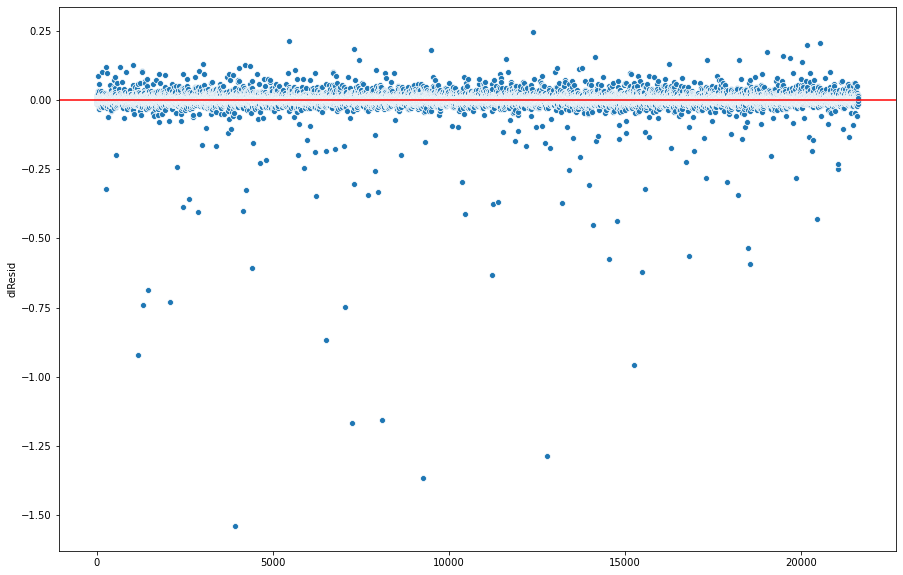

In [51]:
plt.figure(figsize = (15,10))
#plt.text(4,4000000,'R-squared = '+str(ridgeRsquared), size=20) #HOW TO GET A R2 at a Point
ax1 = plt.subplot()
ax1.axhline(0, ls='solid', color='red')
sns.scatterplot(x=resid.index, y=resid.dlResid, ax=ax1)
plt.show()

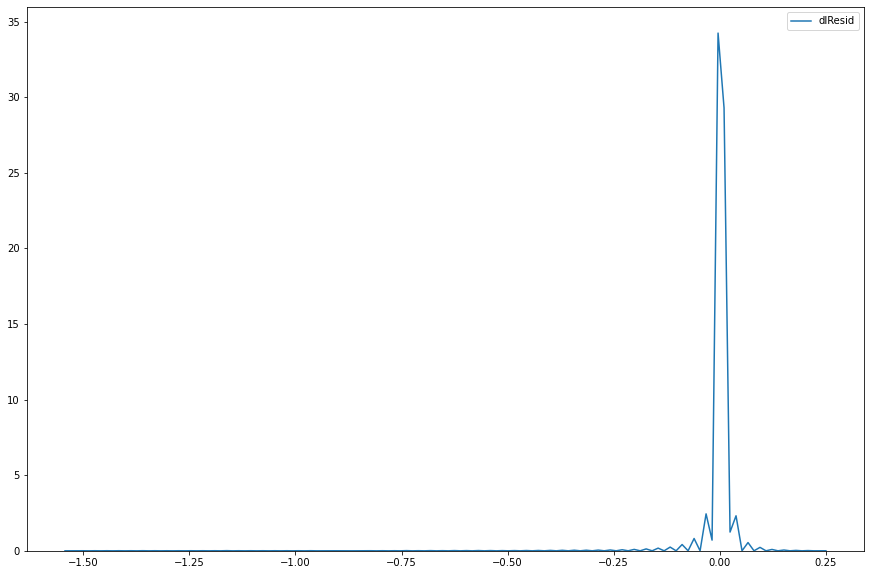

In [53]:
df = resid.dlResid
plt.figure(figsize = (15,10))
#plt.text(2e6,3e-6,'R-squared = '+str(ridgeRsquared), size=20) #HOW TO GET A R2 at a Point
sns.kdeplot(data=df)
plt.show()

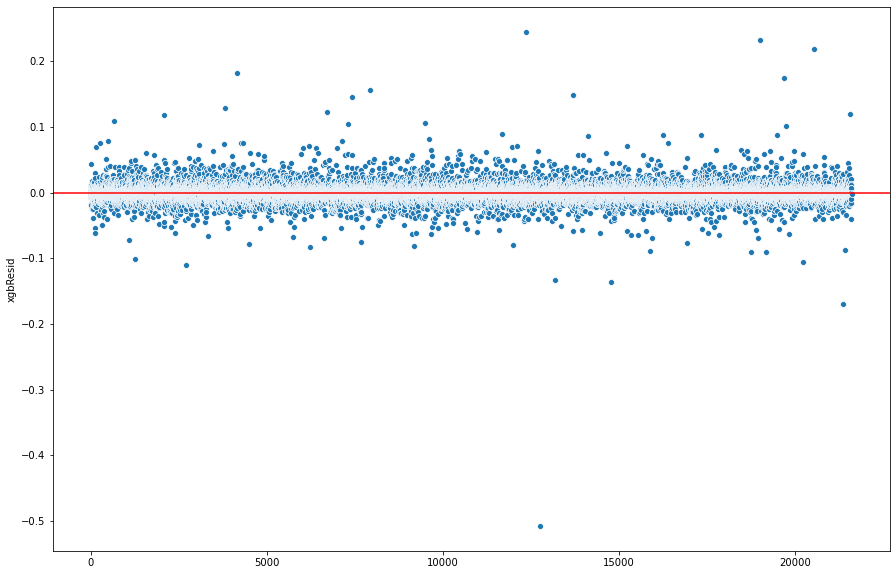

In [52]:
plt.figure(figsize = (15,10))
#plt.text(4,4000000,'R-squared = '+str(ridgeRsquared), size=20) #HOW TO GET A R2 at a Point
ax1 = plt.subplot()
ax1.axhline(0, ls='solid', color='red')
sns.scatterplot(x=resid.index, y=resid.xgbResid, ax=ax1)
plt.show()

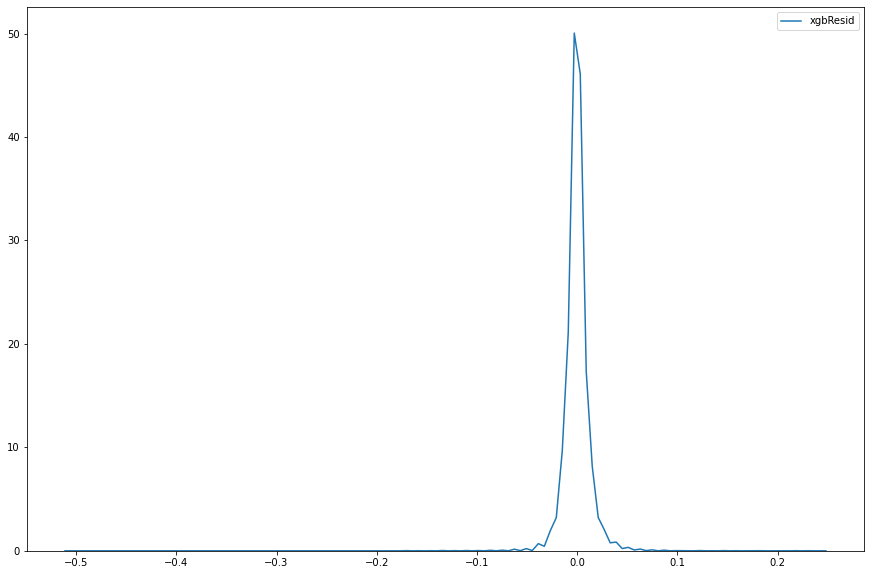

In [54]:
df = resid.xgbResid
plt.figure(figsize = (15,10))
#plt.text(2e6,3e-6,'R-squared = '+str(ridgeRsquared), size=20) #HOW TO GET A R2 at a Point
sns.kdeplot(data=df)
plt.show()

In [57]:
resid['pctFromDlTrue'] = np.where(resid.true > 0, 
                                  abs(resid.dlResid / resid.true)*100, 
                                  abs((resid.dlResid+1) / (resid.true+1))*100)

In [58]:
resid['pctFromXgbTrue'] = np.where(resid.true > 0, 
                                  abs(resid.xgbResid / resid.true)*100,
                                  abs((resid.xgbResid+1) / (resid.true+1))*100)

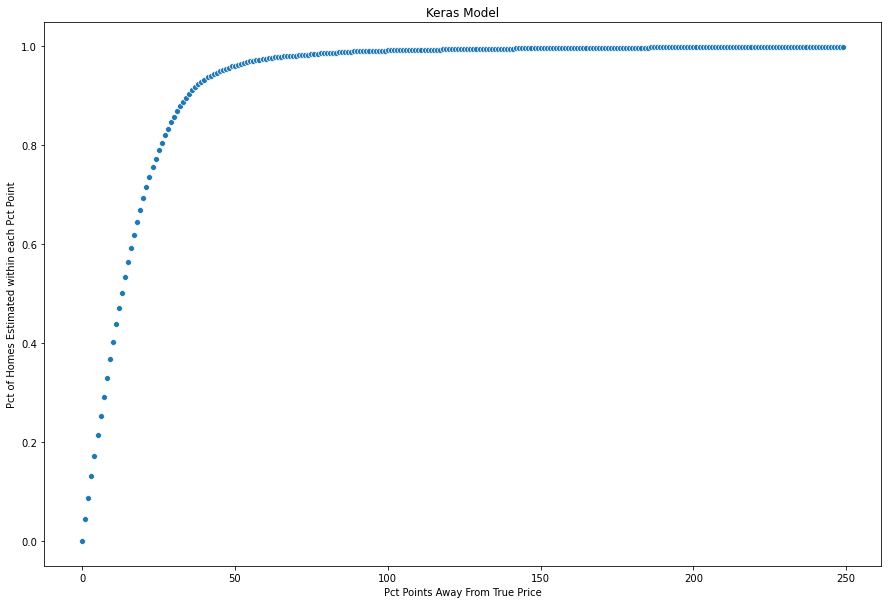

In [61]:
dlDist = [(sum(resid.pctFromDlTrue <= test) / len(resid)) for test in range(0,250)]
dlDist = pd.DataFrame(dlDist)

#plot
plt.figure(figsize=(15,10))
sns.scatterplot(x=dlDist.index, y=dlDist[0])
plt.title('Keras Model')
plt.ylabel('Pct of Homes Estimated within each Pct Point')
plt.xlabel('Pct Points Away From True Price')
plt.show()

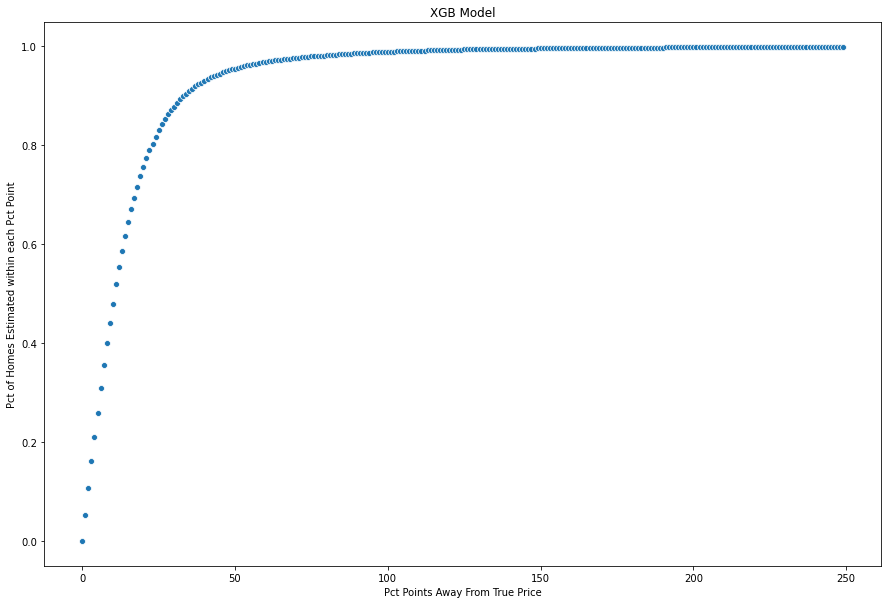

In [62]:
xgbDist = [(sum(resid.pctFromXgbTrue <= test) / len(resid)) for test in range(0,250)]
xgbDist = pd.DataFrame(xgbDist)

#plot
plt.figure(figsize=(15,10))
sns.scatterplot(x=xgbDist.index, y=xgbDist[0])
plt.title('XGB Model')
plt.ylabel('Pct of Homes Estimated within each Pct Point')
plt.xlabel('Pct Points Away From True Price')
plt.show()

In [63]:
compare = pd.concat([dlDist, xgbDist], axis=1, keys=['Keras', 'xgb'])

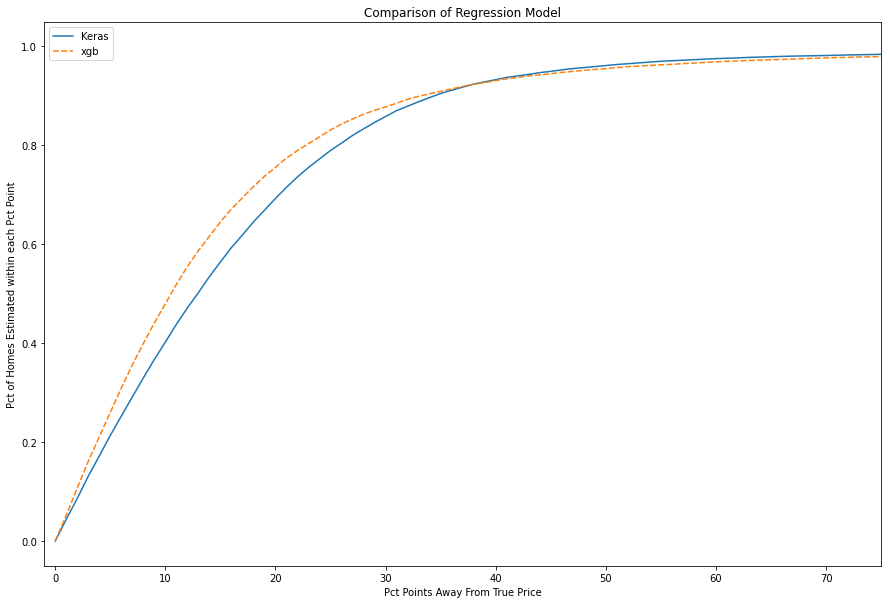

In [64]:
plt.figure(figsize=(15,10))
sns.lineplot(data=compare)
plt.title('Comparison of Regression Model')
plt.ylabel('Pct of Homes Estimated within each Pct Point')
plt.xlabel('Pct Points Away From True Price')
plt.xlim(-1,75)
plt.show()